# A Basic Neural Network

Here's a neural network with one input layer and one output layer (just a single neuron).
This shows the idea behind forward and backward propagation.

This is taken from:

https://iamtrask.github.io/2015/07/12/basic-python-network/

Here are some great references for this:

http://neuralnetworksanddeeplearning.com/chap3.html

https://youtu.be/QWfmCyLEQ8U

https://www.ics.uci.edu/~pjsadows/notes.pdf


In [1]:
#!/usr/bin/env python
'''
Simple two layer neural network (input/output) with backprogation
Sigmoid activation function
Cross entropy loss function
'''
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def activation_function(x,backprop=False):

    '''
    We are using the sigmoid activation function.
    In forward propagation, we just calculate the sigmoid.
    In backward propagation, we calculate the derivative of the sigmoid
    '''
    if(backprop==True):
        return x*(1-x) # Derviative of the sigmoid function

    return 1/(1+np.exp(-x))

In [3]:
# input dataset

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])

# output dataset           

y = np.array([[0,0,1,1]]).T

assert X.shape[0] == y.shape[0], 'input and output must have same number of samples'

In [4]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((X.shape[1],1)).clip(0,1) - 1

Output Before Training:
[[ 0.2689864 ]
 [ 0.36375058]
 [ 0.23762817]
 [ 0.3262757 ]]
Output After Training:
[[ 0.07553274]
 [ 0.06168483]
 [ 0.95008079]
 [ 0.93870164]]
Weights After Training:
[[ 5.45668723]
 [-0.21743969]
 [-2.50760127]]


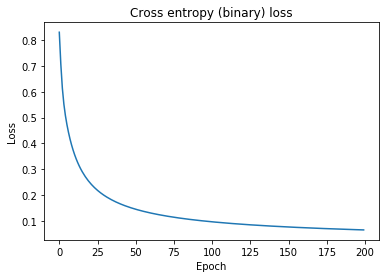

In [5]:
loss = []

num_epochs = 200

for iter in xrange(num_epochs):

    # forward propagation
    layer0 = X
    layer1 = activation_function(np.dot(layer0,syn0)) #Dot product is another way to multiply weights and then sum
    
    if (iter == 0):
        print "Output Before Training:"
        print layer1

    # how much did we miss?
    layer1_error = y - layer1

    # Backward propagation
    # multiply how much we missed by the
    # slope of the sigmoid at the values in layer1
    layer1_delta = layer1_error * activation_function(layer1, True)
    
    # Keep track of the cross entropy (binary) loss
    loss.append(np.mean(np.log(1-layer1)*(y - 1) - np.log(layer1)*y))

    # update weights
    syn0 += np.dot(layer0.T, layer1_delta)

plt.plot(loss);
plt.title('Cross entropy (binary) loss');
plt.xlabel('Epoch');
plt.ylabel('Loss');

print "Output After Training:"
print layer1

print "Weights After Training:"
print syn0